<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2001.csv", encoding='latin-1')
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2006.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2011.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2016.csv")

<ipython-input-4-0f8cf80bd68b>:2: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2006.csv")
<ipython-input-4-0f8cf80bd68b>:3: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2011.csv")
<ipython-input-4-0f8cf80bd68b>:4: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("/content/drive/MyDrive/Datasets/airline_delay2016.csv")


Combining all the dataframes together

In [ ]:
frames = [df1, df2, df3, df4]
df = pd.concat(frames)
df.shape

(691086, 109)

The column names(features) of dataframe

In [ ]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4WheelsOff', 'Div4TailNum', 'Div5Airport', 'Div5AirportID',
       'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime',
       'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum'],
      dtype='object', length=109)

However, out of 109 columns we require only 50 for our analysis. Hence we remove the others for quicker processing. First convert combined dataframe into csv file and delete the columns manually in excel

In [ ]:
df.to_csv('airline_delay2000-2020.csv')

The new df with 50 columns

In [ ]:
import pandas as pd
dfn = pd.read_csv('/content/drive/MyDrive/Datasets/airline_delay2000-2020.csv')
dfn.shape

(691086, 51)

In [ ]:
dfn.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'ReportingAirline', 'TailNumber',
       'FlightNumberReportingAirline', 'OriginAirportID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode',
       'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
dfn.OriginAirportID.value_counts()

10397    41359
13930    35308
11298    30308
12892    22884
11292    22615
         ...  
15502        2
14802        2
12898        1
13347        1
10466        1
Name: OriginAirportID, Length: 361, dtype: int64

In [ ]:
dfn.OriginCityName.value_counts()

Chicago, IL              44159
Atlanta, GA              41359
Dallas/Fort Worth, TX    30308
Houston, TX              25443
Los Angeles, CA          22884
                         ...  
Moab, UT                     2
Moses Lake, WA               2
Staunton, VA                 2
Hoolehua, HI                 1
Latrobe, PA                  1
Name: OriginCityName, Length: 353, dtype: int64

In [ ]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: column;
}
"""

HTML('<style>{}</style>'.format(CSS))

ds = dfn.DestStateName.value_counts()
os = dfn.OriginStateName.value_counts()

display(os)
display(ds)

California                                        82096
Texas                                             78262
Florida                                           46723
Illinois                                          46117
Georgia                                           43322
New York                                          31422
Colorado                                          25732
Arizona                                           22287
Virginia                                          21799
North Carolina                                    20695
Nevada                                            19351
Michigan                                          18919
Pennsylvania                                      16699
Minnesota                                         14410
New Jersey                                        13760
Missouri                                          13631
Tennessee                                         13628
Utah                                            

California                                        82079
Texas                                             77898
Florida                                           46523
Illinois                                          46464
Georgia                                           43195
New York                                          31595
Colorado                                          25604
Arizona                                           22642
Virginia                                          21594
North Carolina                                    20607
Nevada                                            19227
Michigan                                          18563
Pennsylvania                                      16658
Minnesota                                         14389
Missouri                                          14072
Tennessee                                         13961
New Jersey                                        13940
Utah                                            

Finding missing values

Unnamed: 0                           0
Year                                 0
Quarter                              0
Month                                0
DayofMonth                           0
DayOfWeek                            0
FlightDate                           0
ReportingAirline                     0
TailNumber                        5381
FlightNumberReportingAirline         0
OriginAirportID                      0
OriginCityMarketID                   0
Origin                               0
OriginCityName                       0
OriginState                          0
OriginStateName                      0
OriginWac                            0
DestAirportID                        0
DestCityMarketID                     0
Dest                                 0
DestCityName                         0
DestState                            0
DestStateName                        0
DestWac                              0
CRSDepTime                           1
DepTime                  

<Axes: >

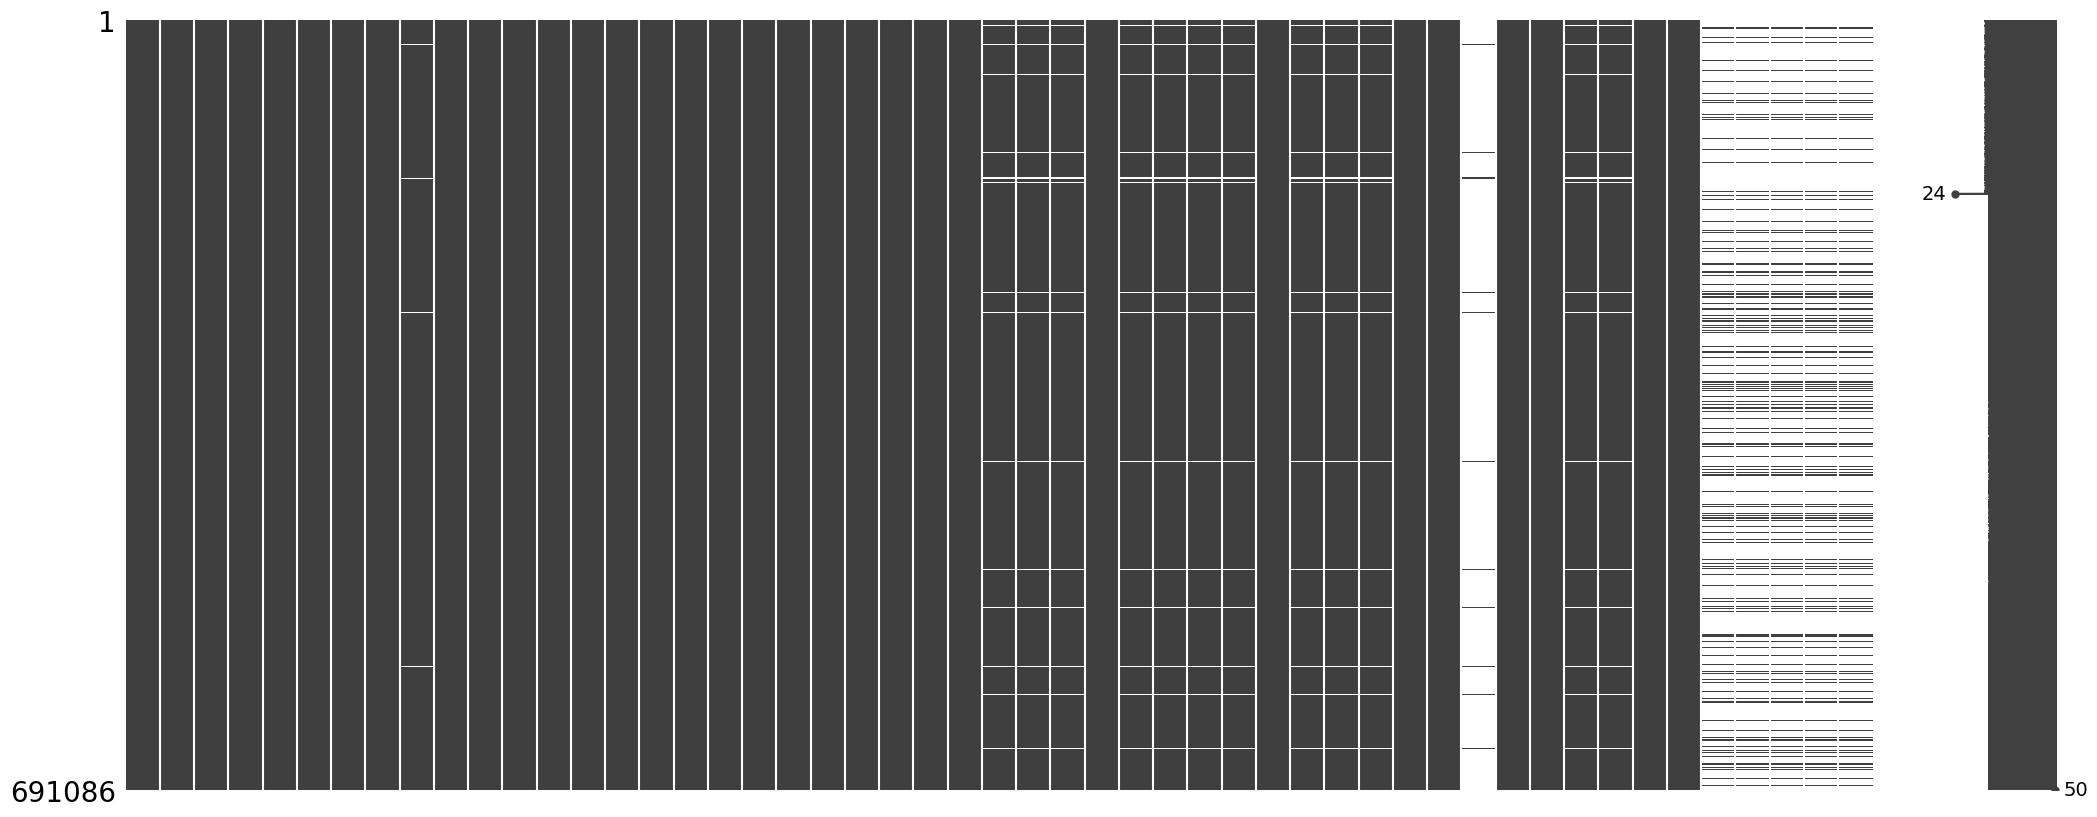

In [ ]:
print(dfn.isna().sum())

%matplotlib inline
import missingno as msno
msno.matrix(dfn)


To find out correlations between variables. The dendrogram allows to more fully correlate variable completion, revealing deeper trends.

<Axes: >

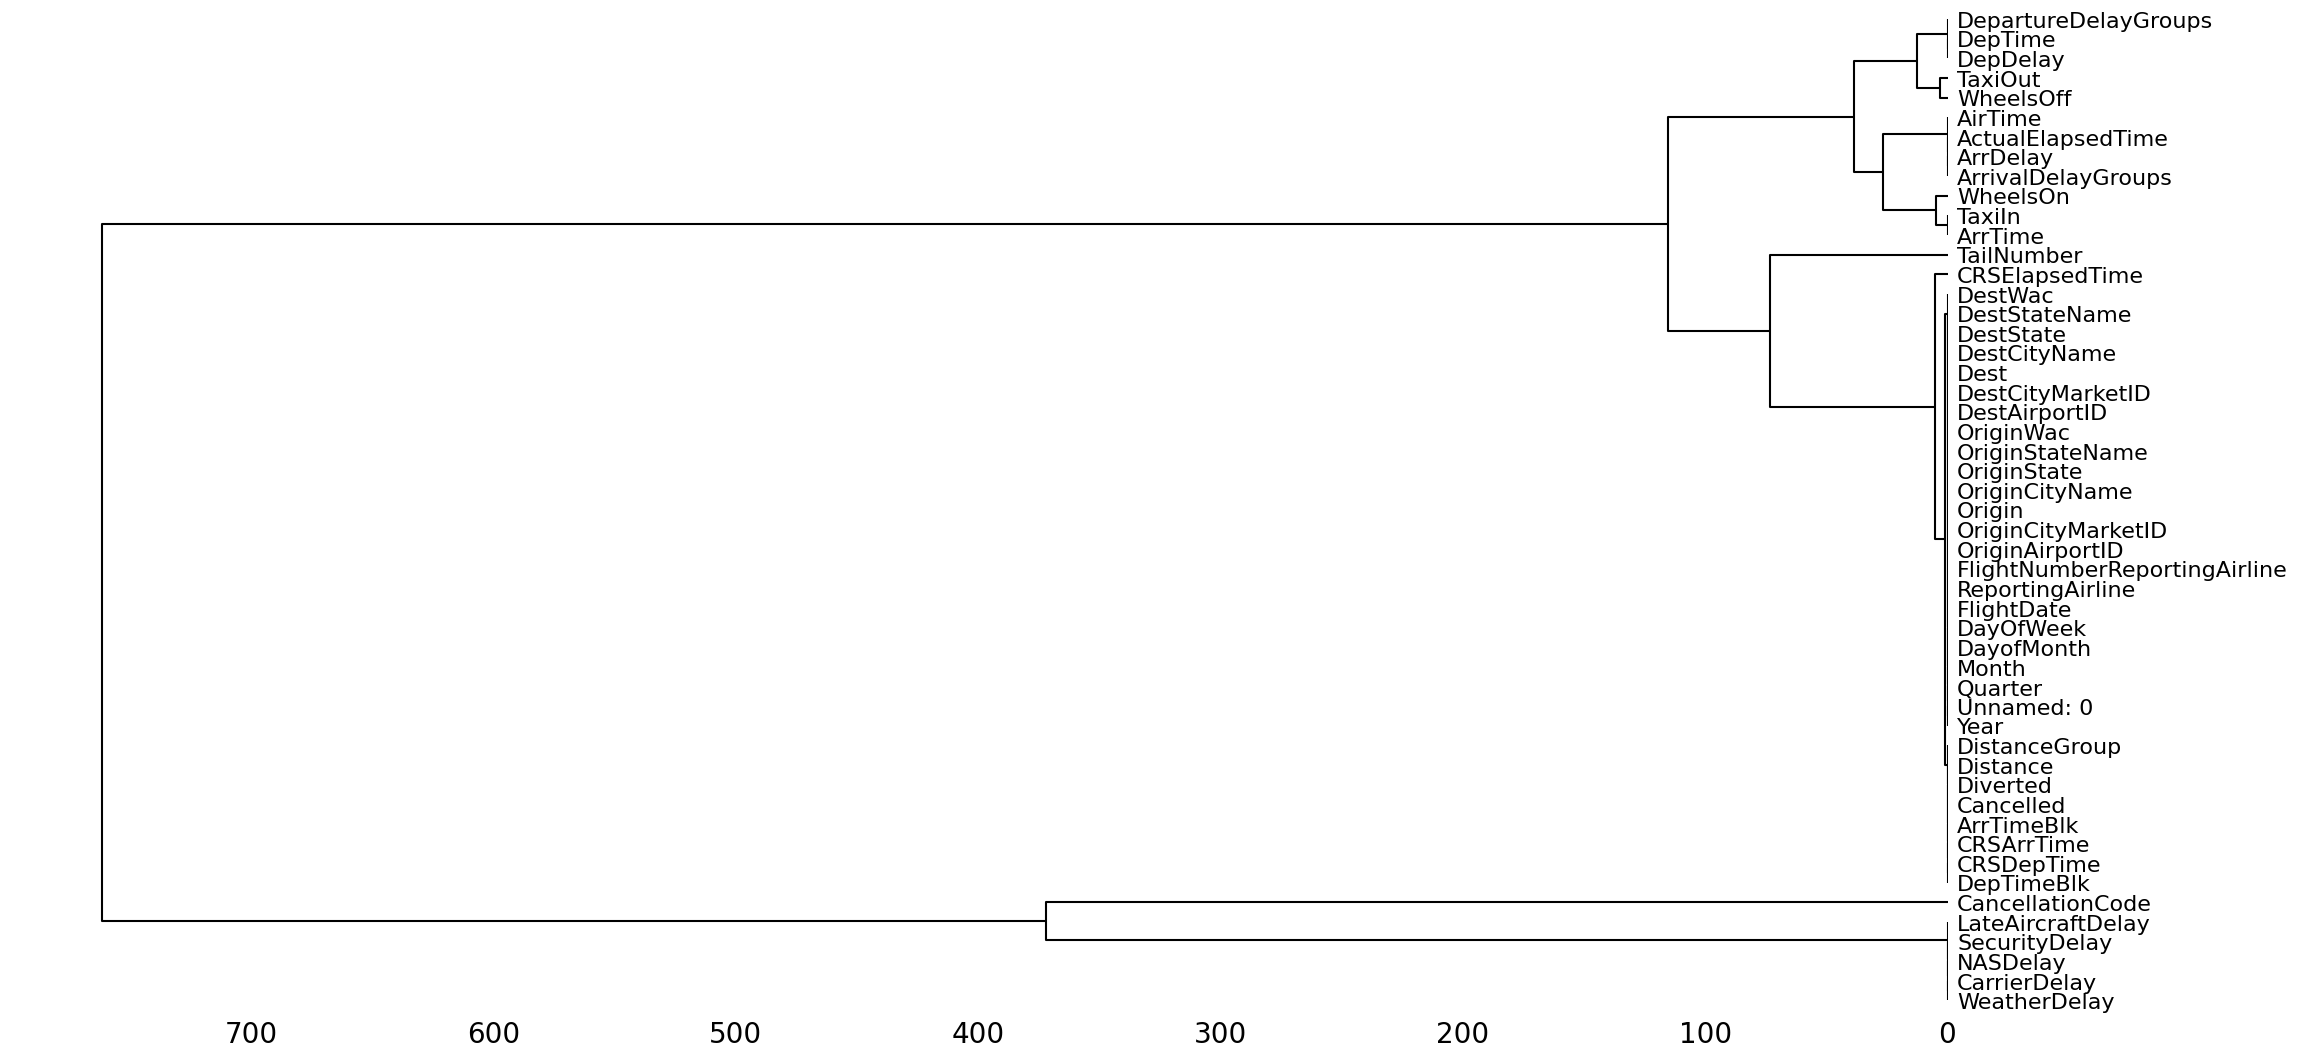

In [ ]:
msno.dendrogram(dfn)

<ipython-input-15-edf89a827f22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sub.corr())


<Axes: >

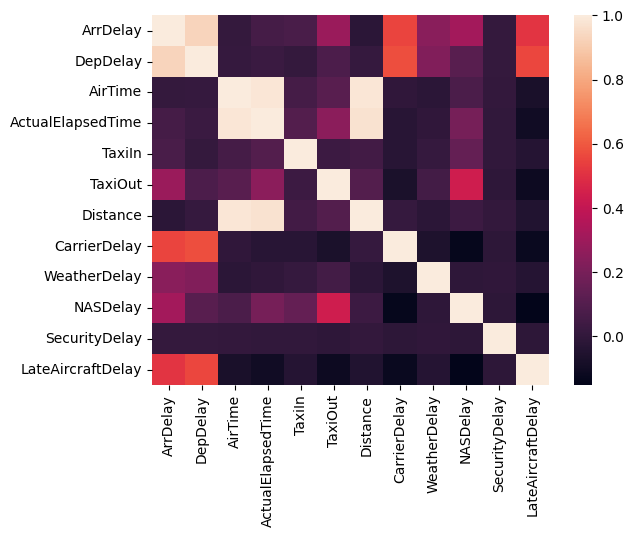

In [ ]:
import seaborn as sns
df_sub = dfn[['TailNumber','ArrDelay','DepDelay', 'AirTime','ActualElapsedTime', 'TaxiIn','TaxiOut','Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
sns.heatmap(df_sub.corr())


**Based on the Heat Map above**
1.  Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).
2.   Variables that are always full or always empty have no meaningful correlation, and so are silently removed.




In [ ]:
import numpy as np
df_sub['TotalDelay'] = df_sub['NASDelay']+df_sub['LateAircraftDelay']+df_sub['SecurityDelay']+df_sub['WeatherDelay']+df_sub['CarrierDelay']
df_sub['GroundTime'] = df_sub['ActualElapsedTime'] - df_sub['AirTime']

df_sub['TotalDelay'] = df_sub['TotalDelay'].replace(np.nan, 0)
df_sub.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,TailNumber,ArrDelay,DepDelay,AirTime,ActualElapsedTime,TaxiIn,TaxiOut,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime
691081,N216WR,20.0,15.0,36.0,65.0,4.0,25.0,197.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0
691082,N278WN,22.0,20.0,58.0,72.0,3.0,11.0,362.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0
691083,N27314,-11.0,-3.0,73.0,88.0,8.0,7.0,509.0,NaN,NaN,NaN,NaN,NaN,0.0,15.0
691084,N719MQ,-10.0,-2.0,39.0,57.0,5.0,13.0,227.0,NaN,NaN,NaN,NaN,NaN,0.0,18.0
691085,N444WN,26.0,23.0,57.0,78.0,5.0,16.0,304.0,0.0,0.0,3.0,0.0,23.0,26.0,21.0


In [ ]:
df_sub['DelayCheck'] = np.where(df_sub['TotalDelay']!= 0.0, True, False)
df_sub["DelayCheck"] = df_sub["DelayCheck"].astype(int)
df_sub.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TailNumber,ArrDelay,DepDelay,AirTime,ActualElapsedTime,TaxiIn,TaxiOut,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime,DelayCheck
691076,N637DL,-16.0,1.0,249.0,272.0,9.0,14.0,1964.0,NaN,NaN,NaN,NaN,NaN,0.0,23.0,0
691077,N891AT,20.0,5.0,136.0,162.0,6.0,20.0,936.0,5.0,0.0,15.0,0.0,0.0,20.0,26.0,1
691078,N511AU,-9.0,-2.0,34.0,49.0,5.0,10.0,130.0,NaN,NaN,NaN,NaN,NaN,0.0,15.0,0
691079,N4YAAA,11.0,-2.0,181.0,208.0,9.0,18.0,1440.0,NaN,NaN,NaN,NaN,NaN,0.0,27.0,0
691080,N526AA,-25.0,1.0,94.0,114.0,9.0,11.0,732.0,NaN,NaN,NaN,NaN,NaN,0.0,20.0,0
691081,N216WR,20.0,15.0,36.0,65.0,4.0,25.0,197.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0,1
691082,N278WN,22.0,20.0,58.0,72.0,3.0,11.0,362.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0,1
691083,N27314,-11.0,-3.0,73.0,88.0,8.0,7.0,509.0,NaN,NaN,NaN,NaN,NaN,0.0,15.0,0
691084,N719MQ,-10.0,-2.0,39.0,57.0,5.0,13.0,227.0,NaN,NaN,NaN,NaN,NaN,0.0,18.0,0
691085,N444WN,26.0,23.0,57.0,78.0,5.0,16.0,304.0,0.0,0.0,3.0,0.0,23.0,26.0,21.0,1


In [ ]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691086 entries, 0 to 691085
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TailNumber         685705 non-null  object 
 1   ArrDelay           676691 non-null  float64
 2   DepDelay           678565 non-null  float64
 3   AirTime            676691 non-null  float64
 4   ActualElapsedTime  676691 non-null  float64
 5   TaxiIn             677389 non-null  float64
 6   TaxiOut            678414 non-null  float64
 7   Distance           691085 non-null  float64
 8   CarrierDelay       127222 non-null  float64
 9   WeatherDelay       127222 non-null  float64
 10  NASDelay           127222 non-null  float64
 11  SecurityDelay      127222 non-null  float64
 12  LateAircraftDelay  127222 non-null  float64
 13  TotalDelay         691086 non-null  float64
 14  GroundTime         676691 non-null  float64
 15  DelayCheck         691086 non-null  int64  
dtypes:

In [ ]:
import numpy as np
df_sub['ActualElapsedTime'] = df_sub['ActualElapsedTime'].replace(np.nan, 0)
df_sub['AirTime'] = df_sub['AirTime'].replace(np.nan, 0)
df_sub['TaxiIn'] = df_sub['TaxiIn'].replace(np.nan, 0)
df_sub['TaxiOut'] = df_sub['TaxiOut'].replace(np.nan, 0)


df_sub = df_sub.assign(check = lambda x: (df_sub['ActualElapsedTime'] - df_sub['AirTime'] == df_sub['TaxiIn']+ df_sub['TaxiOut']))
df_sub.head()
df_sub.check.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

True     689345
False      1741
Name: check, dtype: int64

In [ ]:
df_sub['diff'] = 0

if df_sub.iloc[0]['check'] == 'False':
  df_sub['diff'] = df_sub['ActualElapsedTime'] - df_sub['AirTime']

df_sub['diff'].max()

0

In [ ]:
df_sub = df_sub.drop(['diff','check'],axis=1)
df_stat = df_sub.describe()
df_stat = df_stat.transpose()
df_stat

,count,mean,std,min,25%,50%,75%,max
ArrDelay,676691.0,6.426820,36.191066,-81.0,-11.0,-2.0,10.0,1898.0
DepDelay,678565.0,9.054371,33.308736,-82.0,-4.0,-1.0,7.0,1878.0
AirTime,691086.0,102.539823,69.289422,-686.0,54.0,84.0,132.0,686.0
ActualElapsedTime,691086.0,124.677298,72.457087,-148.0,74.0,107.0,156.0,710.0
TaxiIn,691086.0,6.638022,7.979439,0.0,4.0,5.0,8.0,1439.0
TaxiOut,691086.0,15.590877,10.734411,0.0,10.0,13.0,18.0,1410.0
Distance,691085.0,740.274768,574.416773,27.0,327.0,588.0,972.0,4983.0
CarrierDelay,127222.0,15.983886,40.584257,0.0,0.0,0.0,17.0,1878.0
WeatherDelay,127222.0,2.826909,17.768376,0.0,0.0,0.0,0.0,1153.0
NASDelay,127222.0,15.410212,29.239341,0.0,0.0,4.0,19.0,1053.0


In [ ]:
sns.pairplot(df_sub, hue = 'DelayCheck', palette='Set1')

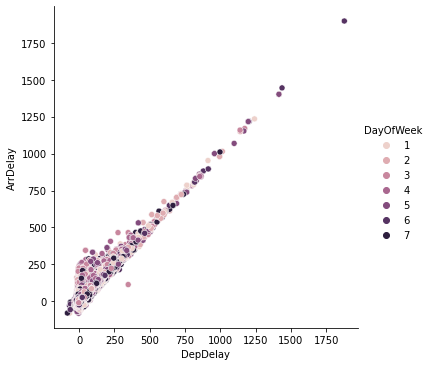

In [ ]:
sns.relplot(x='DepDelay', y='ArrDelay', hue='DayOfWeek', data=dfn)

To find out number of unique values

In [ ]:
 print("unique values: \n", df_sub.nunique())

unique values: 
 TailNumber           12438
ArrDelay               627
DepDelay               584
AirTime                602
ActualElapsedTime      606
TaxiIn                 145
TaxiOut                221
Distance              1679
CarrierDelay           462
WeatherDelay           286
NASDelay               336
SecurityDelay           70
LateAircraftDelay      371
TotalDelay             531
GroundTime             242
DelayCheck               2
dtype: int64


To find the distribution of distance travelled by flights

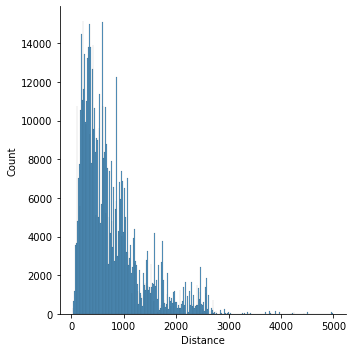

In [ ]:
sns.displot(df_sub['Distance'])

Text(0.5, 0, 'Distance travelled by flight')

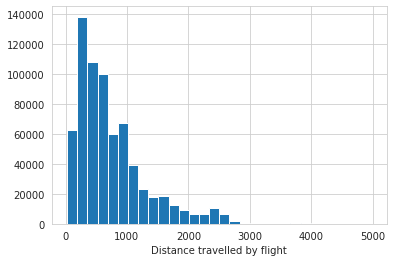

In [ ]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
df_sub['Distance'].hist(bins=30)
plt.xlabel('Distance travelled by flight')

**Joining plots along with their respective histograms**

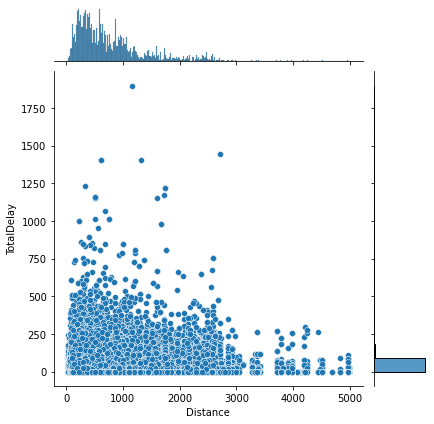

In [ ]:
sns.jointplot(x='Distance', y='TotalDelay', data = df_sub)

In [ ]:
import seaborn as sns
sns.jointplot(x='Distance', y='TotalDelay', data = df_sub, color = 'orange', kind = 'kde')

In [ ]:
dfn

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,900.0,855.0,-5.0,-1.0,0900-0959,14.0,909.0,1148.0,2.0,1206.0,1150.0,-16.0,-2.0,1200-1259,0.0,NaN,0.0,126.0,115.0,99.0,733.0,3.0,NaN,NaN,NaN,NaN,NaN
1,1,2001,3,9,25,2,25/09/01,US,äNKNOæ,6529,10721,30721,BOS,"Boston, MA",MA,Massachusetts,13,11278,30852,DCA,"Washington, DC",VA,Virginia,38,1600.0,NaN,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,1733.0,NaN,NaN,NaN,1700-1759,1.0,NaN,0.0,93.0,NaN,NaN,399.0,2.0,NaN,NaN,NaN,NaN,NaN
2,2,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,1300.0,1259.0,-1.0,-1.0,1300-1359,14.0,1313.0,1611.0,8.0,1613.0,1619.0,6.0,0.0,1600-1659,0.0,NaN,0.0,133.0,140.0,118.0,828.0,4.0,NaN,NaN,NaN,NaN,NaN
3,3,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,1150.0,1150.0,0.0,0.0,1100-1159,10.0,1200.0,1220.0,5.0,1225.0,1225.0,0.0,0.0,1200-1259,0.0,NaN,0.0,95.0,95.0,80.0,528.0,3.0,NaN,NaN,NaN,NaN,NaN
4,4,2003,2,6,6,5,06/06/03,DH,N706BR,7659,13029,33029,LNK,"Lincoln, NE",NE,Nebraska,65,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,1330.0,1330.0,0.0,0.0,1300-1359,3.0,1333.0,1444.0,35.0,1455.0,1519.0,24.0,1.0,1400-1459,0.0,NaN,0.0,85.0,109.0,71.0,466.0,2.0,0.0,0.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,NaN,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,NaN,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,NaN,0.0,96.0,88.0,73.0,509.0,3.0,NaN,NaN,NaN,NaN,NaN
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,NaN,0.0,65.0,57.0,39.0,227.0,1.0,NaN,NaN,NaN,NaN,NaN


**Comparing each individual year**

In [ ]:
dfn['TotalDelay'] = dfn['NASDelay']+dfn['LateAircraftDelay']+dfn['SecurityDelay']+dfn['WeatherDelay']+dfn['CarrierDelay']
dfn['GroundTime'] = dfn['ActualElapsedTime'] - dfn['AirTime']

dfn['TotalDelay'] = dfn['TotalDelay'].replace(np.nan, 0)
dfn.tail(5)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay,GroundTime
691081,186119,2008,1,2,18,1,18/02/08,WN,N216WR,628,11697,32467,FLL,"Fort Lauderdale, FL",FL,Florida,33,15304,33195,TPA,"Tampa, FL",FL,Florida,33,1420.0,1435.0,15.0,1.0,1400-1459,25.0,1500.0,1536.0,4.0,1520.0,1540.0,20.0,1.0,1500-1559,0.0,NaN,0.0,60.0,65.0,36.0,197.0,1.0,0.0,0.0,5.0,0.0,15.0,20.0,29.0
691082,186120,2007,4,11,7,3,07/11/07,WN,N278WN,111,13796,32457,OAK,"Oakland, CA",CA,California,91,13891,32575,ONT,"Ontario, CA",CA,California,91,1115.0,1135.0,20.0,1.0,1100-1159,11.0,1146.0,1244.0,3.0,1225.0,1247.0,22.0,1.0,1200-1259,0.0,NaN,0.0,70.0,72.0,58.0,362.0,2.0,0.0,0.0,2.0,0.0,20.0,22.0,14.0
691083,186121,2006,2,4,20,4,20/04/06,YV,N27314,6168,14698,34236,SBP,"San Luis Obispo, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1226.0,1223.0,-3.0,-1.0,1200-1259,7.0,1230.0,1343.0,8.0,1402.0,1351.0,-11.0,-1.0,1400-1459,0.0,NaN,0.0,96.0,88.0,73.0,509.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,15.0
691084,186122,2010,1,1,13,3,13/01/10,MQ,N719MQ,4629,14492,34492,RDU,"Raleigh/Durham, NC",NC,North Carolina,36,11278,30852,DCA,"Washington, DC",VA,Virginia,38,630.0,628.0,-2.0,-1.0,0600-0659,13.0,641.0,720.0,5.0,735.0,725.0,-10.0,-1.0,0700-0759,0.0,NaN,0.0,65.0,57.0,39.0,227.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,18.0
691085,186123,2009,2,5,16,6,16/05/09,WN,N444WN,1215,14679,33570,SAN,"San Diego, CA",CA,California,91,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,1410.0,1433.0,23.0,1.0,1400-1459,16.0,1449.0,1546.0,5.0,1525.0,1551.0,26.0,1.0,1500-1559,0.0,NaN,0.0,75.0,78.0,57.0,304.0,2.0,0.0,0.0,3.0,0.0,23.0,26.0,21.0


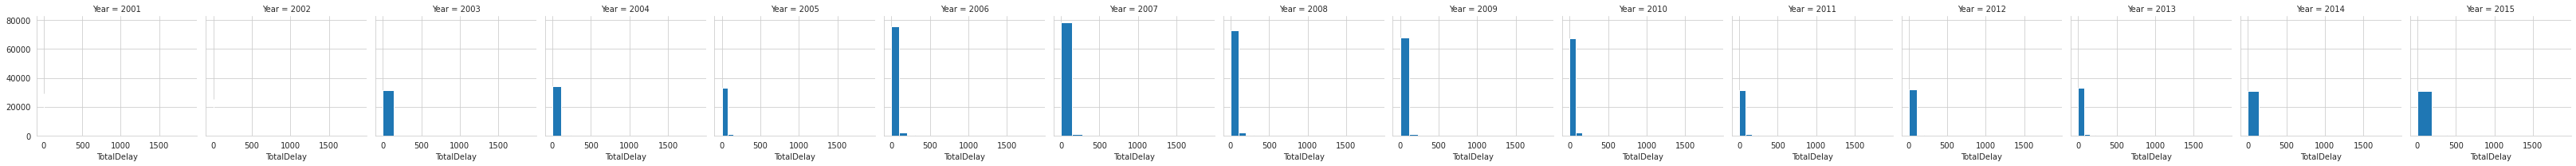

In [ ]:
g=sns.FacetGrid(dfn, col='Year')
g.map(plt.hist, 'TotalDelay')

**Comparing each individual month**

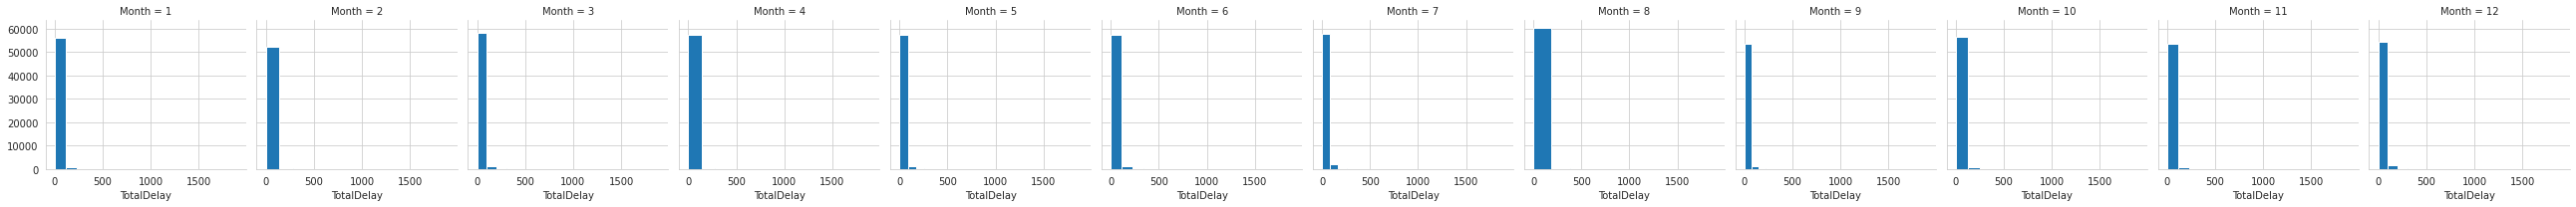

In [ ]:
g=sns.FacetGrid(dfn, col='Month')
g.map(plt.hist, 'TotalDelay')

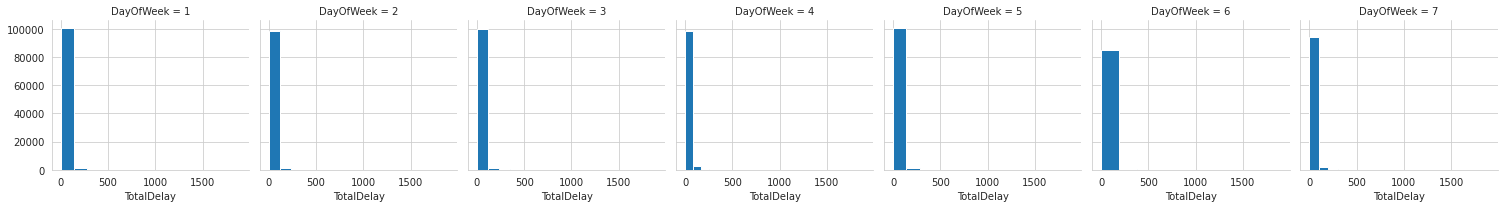

In [ ]:
g=sns.FacetGrid(dfn, col='DayOfWeek')
g.map(plt.hist, 'TotalDelay')

In [ ]:
#df_sub.drop(df_sub[df_sub.iloc[:,1:-2]==0].index, inplace = True)

In [ ]:
df_sub.columns

Index(['TailNumber', 'ArrDelay', 'DepDelay', 'AirTime', 'ActualElapsedTime',
       'TaxiIn', 'TaxiOut', 'Distance', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TotalDelay',
       'GroundTime', 'DelayCheck'],
      dtype='object')

In [ ]:
df_sub.isna().sum()

TailNumber             5381
ArrDelay              14395
DepDelay              12521
AirTime                   0
ActualElapsedTime         0
TaxiIn                    0
TaxiOut                   0
Distance                  1
CarrierDelay         563864
WeatherDelay         563864
NASDelay             563864
SecurityDelay        563864
LateAircraftDelay    563864
TotalDelay                0
GroundTime            14395
DelayCheck                0
dtype: int64

In [ ]:
df_model = df_sub.replace(np.nan, 0)


In [ ]:
del df_model['TailNumber']


###Decision Tree Algorithm

In [ ]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset


X = df_model.iloc[:].values
y = df_model.iloc[:, -1].values

# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting a new result
#regressor.predict([[6.5]])

# Visualising the Decision Tree Regression results (higher resolution)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')